# Actividad 1

Carga el fichero ventas.csv antes de comenzar. Crea una nueva celda para comparar tu resultado con el resultado deseado mostrado en cada ejercicio

In [2]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import plotly.graph_objs as go

In [3]:
dfventas = pd.read_csv('ventas.csv')

In [4]:
dfventas.head(12)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


## Ejercicio 1: lee el beneficio total de todos los meses y muéstralo mediante un diagrama de líneas

Datos de ganancias totales proporcionados para cada mes. El diagrama de líneas generado debe incluir las siguientes propiedades: –

    Nombre de etiqueta X = Número de mes
    Nombre de la etiqueta Y = Beneficio total

El gráfico de trazado de líneas debería tener este aspecto.

![Grafico1](https://live.staticflickr.com/65535/52932036540_91cd44ed8e_o.png)

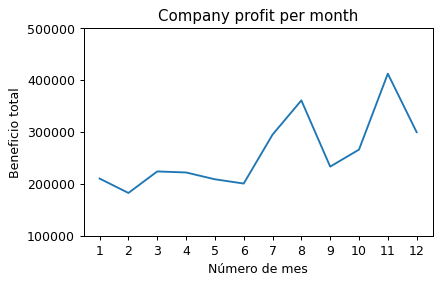

In [5]:
#No consigo que me salga el mismo tamaño que en el ejemplo. Pero pongo este tamaño porque queda bien
plt.figure(figsize=(5, 3), dpi=90) 
#Vamos a hacer en estos ejercicios un group by el número del mes
#Si no, nos presenta enero como el mes 0, febrero como el mes 1, etc...
dfventas.groupby('month_number')['total_profit'].sum().plot(kind='line')
plt.title('Company profit per month')
plt.xlabel('Número de mes')
plt.ylabel('Beneficio total')
#He buscado esta función para que los números de los ejes sean iguales
#a los del gráfico del ejercicio
plt.xticks(range(1, 13))
plt.yticks(range(100000, 500001, 100000))
plt.show()

## Ejercicio 2: obten el beneficio total de todos los meses y muestra el diagrama de líneas con las siguientes propiedades de estilo

El diagrama de líneas generado debe incluir las siguientes propiedades de estilo: –

    Estilo de línea punteado y color de línea debe ser rojo
    Mostrar leyenda en la ubicación inferior derecha.
    Nombre de etiqueta X = Número de mes
    Nombre de etiqueta Y = número de unidades vendidas
    Añade un marcador de círculo.
    Color del marcador de línea como se lee
    El ancho de línea debe ser 3

El gráfico de trazado de líneas debería tener este aspecto.
![Grafico2](https://live.staticflickr.com/65535/52932099133_dc3039bc25_o.png)

*Esto no lo entiendo ¿Por qué tenemos que poner el número de unidades vendidas si lo que sigue
mostrando el gráfico es el beneficio?  
Como no se lo que se está pidiendo lo voy a hacer de dos maneras:*
- Haciendo que el gráfico represente el beneficio
- Haciendo que el gráfico represente las unidades vendidas 

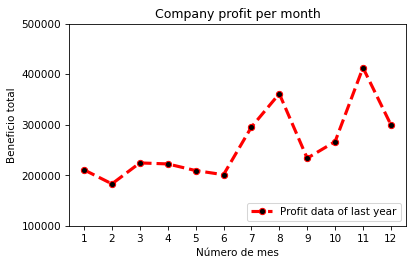

In [6]:
#El gráfico representa el beneficio total
plt.figure(figsize=(5, 3), dpi=75).add_axes([0,0,0.9,0.9])
#Con add_axes consigo que la leyenda se sitúe más o menos en el mismo sitio que en el ejemplo
dfventas.groupby('month_number')['total_profit'].sum().plot(
    kind='line', color="red", lw=3, ls='--', 
    marker='o',markerfacecolor="black", 
    label='Profit data of last year')
plt.legend(loc=4)
plt.title('Company profit per month')
plt.xlabel('Número de mes')
plt.ylabel('Beneficio total')
plt.xticks(range(1, 13))
plt.yticks(range(100000, 500001, 100000))
plt.show()

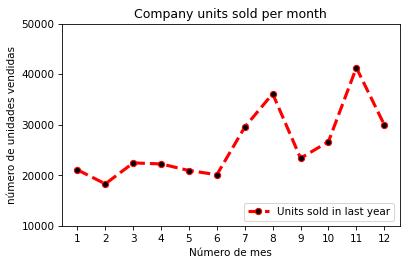

In [7]:
#El gráfico represente las unidades totales vendidas
plt.figure(figsize=(5, 3), dpi=75).add_axes([0,0,0.9,0.9])
dfventas.groupby('month_number')['total_units'].sum().plot(
    kind='line', color="red", lw=3, ls='--', 
    marker='o',markerfacecolor="black", 
    label='Units sold in last year')
plt.legend(loc=4)
plt.title('Company units sold per month')
plt.xlabel('Número de mes')
plt.ylabel('número de unidades vendidas')
plt.xticks(range(1, 13))
plt.yticks(range(10000, 50001, 10000))
plt.show()

## Ejercicio 3: lee todos los datos de ventas de productos y muéstralos usando un gráfico multilínea

Muestre el número de unidades vendidas por mes para cada producto utilizando gráficos de líneas múltiples. (es decir, trama separada para cada producto).

El gráfico debería verse así.
![Grafico3](https://live.staticflickr.com/65535/52932107478_37ddf0f559_o.png)

*Aquí creo que hay otro error. En el gráfico ha llamado a todos los productos Toothpaste  
Yo voy a hacerlo poniendo a cada producto el nombre correcto*

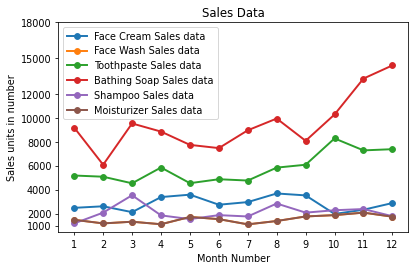

In [8]:
plt.figure(figsize=(5, 3), dpi=70).add_axes([0,0,1,1])
dfventas.groupby('month_number')['facecream'].sum().plot(
    kind='line',color="#1f77b4", lw=2, ls='-', 
    marker='o', 
    label='Face Cream Sales data')
dfventas.groupby('month_number')['facewash'].sum().plot(
    kind='line',color="#ff7f0e", lw=2, ls='-', 
    marker='o', 
    label='Face Wash Sales data')
dfventas.groupby('month_number')['toothpaste'].sum().plot(
    kind='line',color="#2ca02c", lw=2, ls='-', 
    marker='o', 
    label='Toothpaste Sales data')
dfventas.groupby('month_number')['bathingsoap'].sum().plot(
    kind='line',color="#d62728", lw=2, ls='-', 
    marker='o', 
    label='Bathing Soap Sales data')
dfventas.groupby('month_number')['shampoo'].sum().plot(
    kind='line',color="#9467bd", lw=2, ls='-', 
    marker='o', 
    label='Shampoo Sales data')
dfventas.groupby('month_number')['moisturizer'].sum().plot(
    kind='line',color="#8c564b", lw=2, ls='-', 
    marker='o', 
    label='Moisturizer Sales data')
plt.legend(loc=2)
plt.title('Sales Data')
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.xticks(range(1, 13))
plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.show()

## Ejercicio 4: Lee los datos de ventas de pasta de dientes de cada mes y muéstralo usando un diagrama de dispersión

Además, agregue una cuadrícula en la trama. el estilo de línea de cuadrícula debe ser “–“.

El diagrama de dispersión debería verse así.
![Grafico4](https://live.staticflickr.com/65535/52932051210_3cc58e26dd_o.png)

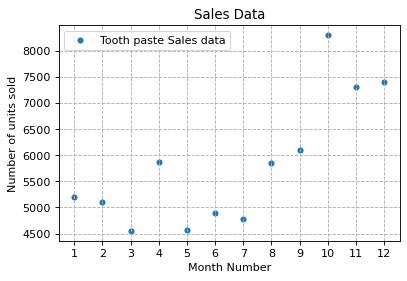

In [502]:
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=80)
dfventas.plot.scatter(x='month_number', y='toothpaste', label='Tooth paste Sales data', ax=ax)
plt.legend(loc=2)
plt.title('Sales Data')
plt.xlabel('Month Number')
plt.ylabel('Number of units sold')
plt.xticks(range(1, 13))
plt.yticks(range(4500, 8001, 500))
plt.grid(True, ls='--')
plt.show()

## Ejercicio 5: Lee los datos de ventas de productos de cremas y lavados faciales y muéstralos usando el gráfico de barras

El gráfico de barras debe mostrar el número de unidades vendidas por mes para cada producto. Agregue una barra separada para cada producto en el mismo gráfico.

El gráfico de barras debería verse así.
![Grafico5](https://live.staticflickr.com/65535/52932107503_231d52ec89_o.png)

*Se puede hacer de dos maneras a hacer de dos maneras:*
- Cambiando el nombre de las columnas del DataFrame
- Sin cambiar el nombre de las columnas del Dataframe

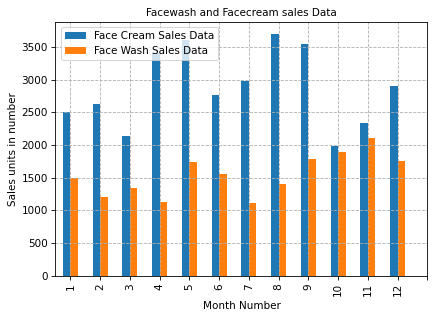

In [503]:
#VAMOS A HACERLO CAMBIANDO EL NOMBRE DE LAS COLUMNAS
#Creamos un nuevo Dataframe con las columnas renombradas
dfventas2 = dfventas.rename(
    columns={'facecream':'Face Cream Sales Data','facewash':'Face Wash Sales Data'})
#Creamos un gráfico en base a nuestro nuevo datafreme con las columnas renombradas
fig, ax = plt.subplots(figsize=(6.4, 4.4), dpi=75)
dfventas2.groupby('month_number')[['Face Cream Sales Data','Face Wash Sales Data']].sum(
).plot.bar(ax=ax)
plt.legend(loc=2)
plt.title('Facewash and Facecream sales Data', fontsize=10)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.xticks(range(0, 13))
plt.yticks(range(0, 3501, 500))
plt.grid(True, ls='--')
plt.show()

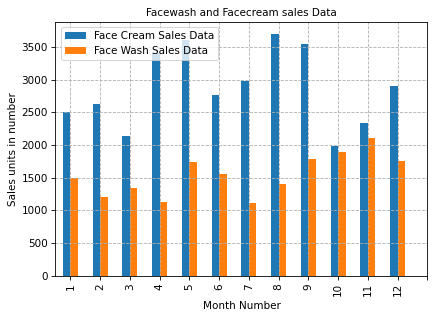

In [504]:
#VAMOS A HACERLO SIN CAMBIAR EL NOMBRE DE LAS COLUMNAS 
#Creamos un gráfico en base a nuestro nuevo datafreme con las columnas renombradas
fig, ax = plt.subplots(figsize=(6.4, 4.4), dpi=75)
dfventas.groupby('month_number')[['facecream','facewash']].sum(
).plot.bar(ax=ax)
plt.title('Facewash and Facecream sales Data', fontsize=10)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.xticks(range(0, 13))
plt.yticks(range(0, 3501, 500))
plt.grid(True, ls='--')
plt.legend(['Face Cream Sales Data','Face Wash Sales Data'], loc=2)
plt.show()

## Ejercicio 6: Lee los datos de ventas de jabón de baño de todos los meses y muéstralo mediante un gráfico de barras. Guarde este diagrama en su disco duro

El gráfico de barras debería verse así.
![Grafico6](https://live.staticflickr.com/65535/52932107488_3081c08d6f_o.png)

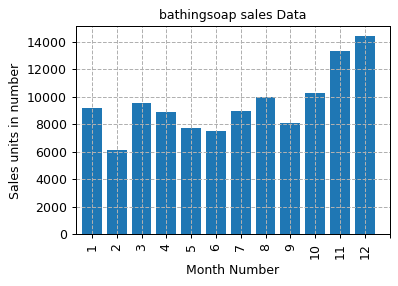

In [505]:
fig, axes = plt.subplots(figsize=(4.5, 3), dpi=90)
dfventas.groupby('month_number')['bathingsoap'].sum(
).plot.bar(axes=axes,width=0.8)
plt.title('bathingsoap sales Data', fontsize=10)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.xticks(range(0, 13))
plt.yticks(range(0, 14001, 2000))
plt.grid(True, ls='--')
plt.show()
fig.savefig('graficoguardadado.png', dpi=200)

## Ejercicio 7: Lee el beneficio total de cada mes y muéstralo usando el histograma para ver los rangos de beneficio más comunes

El histograma debería verse así.
![Grafico7](https://live.staticflickr.com/65535/52931658186_24a2b3b371_o.png)

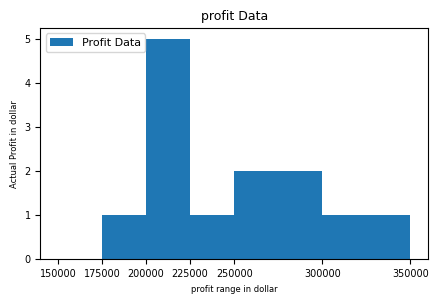

In [506]:
#Para no tener que escribir una lista con los ejes a mano
#Vamos a crear una lista que guarde los valores del eje x
#El resultado es [150000, 175000, 200000, 225000, 250000, 300000, 350000]
ejesx = []
for i in range(150000, 250001, 25000):
    ejesx.append(i)
ejesx.extend([300000,350000])
#Ya teniendo nuestra lista de ejes, procedemos a hacer el grafico
plt.figure(figsize=(5, 3))
dfventas['total_profit'].hist(bins=(ejesx), label='Profit Data')
plt.legend(loc=2, fontsize=8)
plt.title('profit Data', fontsize=9)
plt.xlabel('profit range in dollar', fontsize=6)
plt.ylabel('Actual Profit in dollar', fontsize=6)
plt.xticks(ejesx, fontsize=7)
plt.yticks(range(0, 6), fontsize=7)
plt.grid(False)#Quitamos las lineas que nos salen por defecto
plt.show()

## Ejercicio 8: Calcula los datos de ventas totales del último año para cada producto y muéstralos usando un gráfico circular (pie chart)

Nota: En la visualización del gráfico circular Número de unidades vendidas por año para cada producto en porcentaje.

El gráfico circular debería verse así.
![Grafico8](https://live.staticflickr.com/65535/52931813279_f23e03e46e_o.png)

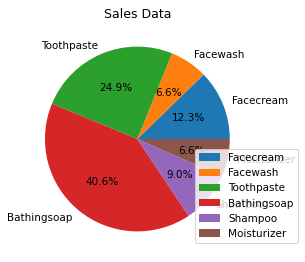

In [507]:
#Para no tener que escribir una lista con los nombres de columna a mano
#Vamos a crear una lista que guarde los nombres de los productos
nombresproductos = []
for i in range(1,(dfventas.shape[1]-2)):
    nombresproductos.append(dfventas.columns[i])
#Creamos otra variable que guarde las ventas totales
#Este bucle va guardando la suma de las ventas de cada producto
#En una lista
ventastotales = []
for i in range(len(nombresproductos)):
    ventastotales.append(dfventas[nombresproductos[i]].sum())
#Como tenemos los nombres de las etiquetas en nuestro dataframe en minúscula
#Pero en el ejemplo tenemos la primera en mayúscula, creamos una nueva lista
#Que guarde los nombres de las etiquetas como en el ejemplo
etiquetas = []
for i in range(len(nombresproductos)):
    producto = ((nombresproductos[i])[0]).upper()
    for j in range(1,(len(nombresproductos[i]))):
        producto = producto + (nombresproductos[i])[j]
    etiquetas.append(producto)
#Creamos el grafico
fig, ax = plt.subplots(figsize=(6, 4), dpi=75)
ax.pie(ventastotales, labels=etiquetas, autopct='%1.1f%%')
plt.legend(loc=(0.75, 0.05))
plt.title('Sales Data')
plt.show()

## Ejercicio 9: Muestra los datos de los productos Bathing Soap y Facewash utilizando dos tramas

El gráfico secundario debería verse así.
![Grafico9](https://live.staticflickr.com/65535/52932051220_4813c99235_o.png)

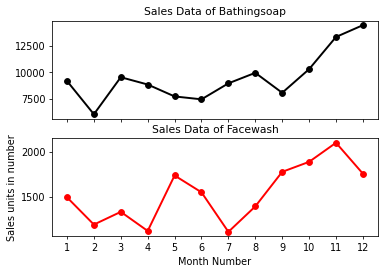

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), dpi=70)
axes[0].plot(dfventas['month_number'], dfventas['bathingsoap'],color='black',lw=2, ls='-', marker='o')
axes[0].set_title('Sales Data of Bathingsoap', fontsize=11)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels([])
axes[0].set_yticks(range(7500, 12501, 2500))
axes[0].set_yticklabels(range(7500, 12501, 2500), fontsize=10)
axes[1].plot(dfventas['month_number'], dfventas['facewash'],color='red',lw=2, ls='-', marker='o')
axes[1].set_title('Sales Data of Facewash', fontsize=11)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(range(1, 13), fontsize=10)
axes[1].set_yticks(range(1500, 2001, 500))
axes[1].set_yticklabels(range(1500, 2001, 500), fontsize=10)
axes[1].set_xlabel('Month Number', fontsize=10)
axes[1].set_ylabel('Sales units in number', fontsize=10)
plt.show()

## Ejercicio 10: Lee todos los datos de ventas de productos y muéstralos usando el diagrama de pila

El diagrama de pila debería verse así.
![Grafico10](https://live.staticflickr.com/65535/52932051235_154840359f_o.png)

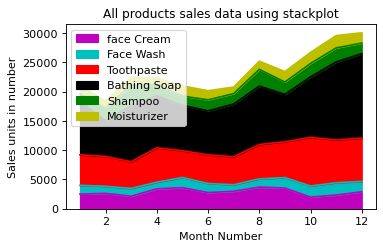

In [560]:
#Como en el ejercicio 8 habíamos creado una lista on los nombres de productos.
#Vamos a usar esa lista para filtrar
fig, ax = plt.subplots(figsize=(5, 3), dpi=80)
dfventas.groupby('month_number')[nombresproductos].sum().plot.area(ax=ax,
    color = ['#bf00bf', '#00bfbf', '#ff0000', '#000000', '#008000', '#bfbf00'])
#Vamos a hacer una lista con los nombres de las etiquetas,
#No se puede hacer un bucle for, porque algunos sólo algunos empiezan por mayúsculas
#Otros además, tienen espacios
etiquetasnuevas = ['face Cream', 'Face Wash', 'Toothpaste', 'Bathing Soap', 'Shampoo', 'Moisturizer']
#Creamos la leyenda:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, etiquetasnuevas, loc=2)
plt.title('All products sales data using stackplot', fontsize=11)
plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.show()